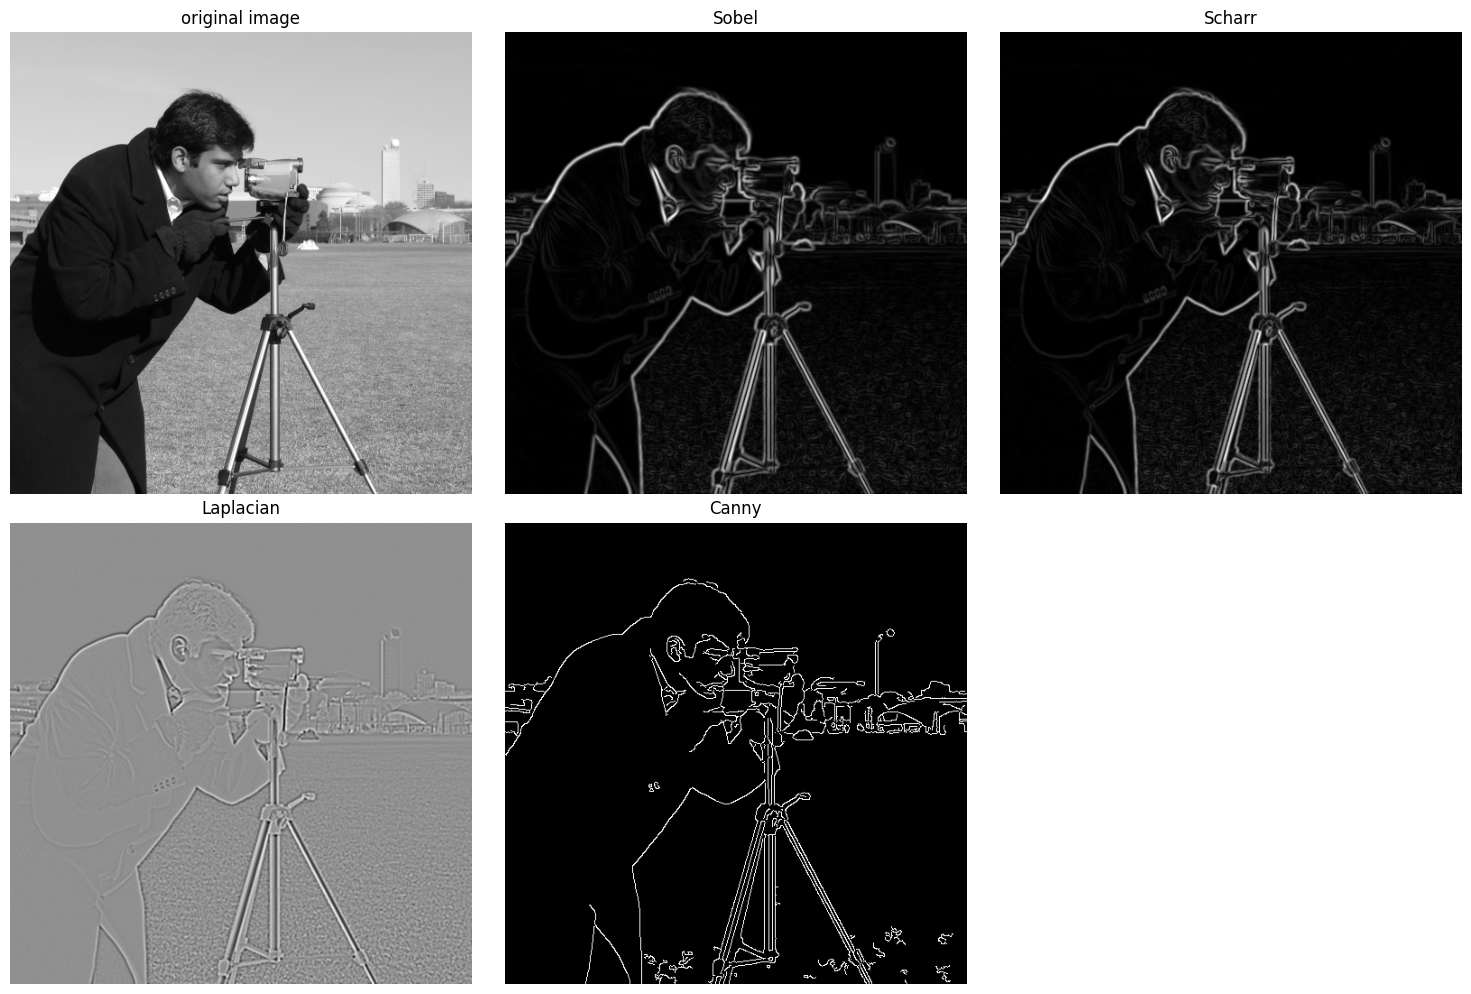

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage import data

image = data.camera()  # دي صورة أبيض وأسود جاهزة

# 2. نطبق GaussianBlur عشان نخفف الضوضاء
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# 3. Sobel
sobelx = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=5)
sobel_combined = np.sqrt(sobelx**2 + sobely**2)  # طريقة تانية لحساب المقدار

# 4. Scharr
scharrx = cv2.Scharr(blurred, cv2.CV_64F, 1, 0)
scharry = cv2.Scharr(blurred, cv2.CV_64F, 0, 1)
scharr_combined = np.sqrt(scharrx**2 + scharry**2)

# 5. Laplacian
laplacian = cv2.Laplacian(blurred, cv2.CV_64F)

# 6. Canny (الأقوى)
canny = cv2.Canny(blurred, 50, 150)  # ثريشهولد أقل عشان نوضح الحواف

# 7. نعرض كل الصور
images = [image, sobel_combined, scharr_combined, laplacian, canny]
titles = ['original image', 'Sobel', 'Scharr', 'Laplacian', 'Canny']

plt.figure(figsize=(15, 10))
for i in range(len(images)):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()